In [350]:
# from google.colab import drive
# drive.mount('/content/drive')

## Load Python Settings<div class="tocSkip"/>

In [351]:
# suppress warnings
import warnings;
warnings.filterwarnings('ignore');

# common imports
import pandas as pd
import numpy as np
import math
import re
import glob
import os
import sys
import json
import random
import pprint as pp
# import textwrap
# import sqlite3
# import logging

# import spacy
# import nltk

# from tqdm.auto import tqdm
# # register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
# tqdm.pandas()

# # pandas display options
# # https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#available-options
# pd.options.display.max_columns = 30 # default 20
# pd.options.display.max_rows = 60 # default 60
# pd.options.display.float_format = '{:.2f}'.format
# # pd.options.display.precision = 2
# pd.options.display.max_colwidth = 200 # default 50; -1 = all
# # otherwise text between $ signs will be interpreted as formula and printed in italic
# pd.set_option('display.html.use_mathjax', False)

# # np.set_printoptions(edgeitems=3) # default 3

# import matplotlib
# from matplotlib import pyplot as plt

# plot_params = {'figure.figsize': (8, 4),
#                'axes.labelsize': 'large',
#                'axes.titlesize': 'large',
#                'xtick.labelsize': 'large',
#                'ytick.labelsize':'large',
#                'figure.dpi': 100}
# # adjust matplotlib defaults
# matplotlib.rcParams.update(plot_params)

import seaborn as sns
sns.set_style("darkgrid")

## Machine Learning Packages

In [352]:
import matplotlib.pyplot as plt
import html
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

### Working directory

In [353]:
# BASE_DIR = '/content/drive/MyDrive/data'
# os.chdir(BASE_DIR)

# Introducing the Java Development Tools Bug Dataset

In [354]:
file = r"d:\Users\Lenovo\Desktop\eclipse_jdt.csv"
raw_df = pd.read_csv(file)
raw_df.info()
raw_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45296 entries, 0 to 45295
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Issue_id          45296 non-null  int64  
 1   Priority          45296 non-null  object 
 2   Component         45296 non-null  object 
 3   Duplicated_issue  7688 non-null   float64
 4   Title             45296 non-null  object 
 5   Description       45253 non-null  object 
 6   Status            45296 non-null  object 
 7   Resolution        45296 non-null  object 
 8   Version           45296 non-null  object 
 9   Created_time      45296 non-null  object 
 10  Resolved_time     45296 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.8+ MB


,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time
0,1518,P1,Debug,NaN,Icons needed for actions (1GI5UXW),JGS (8/8/01 5:20:19 PM); \tWe need enabled; disabled & hover icons for the following actions:; \t\tCopyToClipboardActionDelegate; \t\tRelaunchActionDelegate; \t\tTerminateAndRemoveActionDelegate; ; DW (9/24/2001 2:22:48 PM); \tUse the standard copy icon for copy to clipboard (desktop likely exposes it).; ; DW (9/24/2001 2:23:05 PM); \tMade requests for; \t\tRelaunch; \t\tTerminate All; \t\tTerminate & Remove,VERIFIED,FIXED,2.0,2001-10-10 22:14:00 -0400,2001-10-18 11:51:14 -0400
1,1519,P3,Debug,NaN,README: Hit count not reset (1GET20Y),JGS (6/4/01 11:43:47 AM); \tSet a breakpoint in InfiniteLoop with a hit count. When suspended;; \tright click breakpoint in Breakpoints viewer and enable. Hit count; \tstays at previous value. Should it be reset to zero?; ; DW (6/4/01 11:50:23 AM); \tThis should just re-enable the breakpoint with the previous hit-count.; ; DS (6/4/2001 11:50:31 AM); \tTo change a hit count breakpoint into a normal breakpoint; you set its hit count to zero.; \tThis should likely be a readme item.; ; DW (6/4/01 6:33:43 PM); \tMake into a README.; ; DW (6/15/01 9:45:55 AM); \tAdded to README.,RESOLVED,WORKSFORME,2.0,2001-10-10 22:14:00 -0400,2001-11-28 13:42:46 -0500
2,1520,P3,Debug,NaN,Use styled text in console (1G9S1YF),DW (2/26/01 5:56:36 PM); \tCould allow users to use styled text in console; with preference support. This would; \tallow console input to be shown in bold; etc.,CLOSED,WONTFIX,2.0,2001-10-10 22:14:00 -0400,2002-06-26 11:32:05 -0400


In [355]:
raw_df.nunique()

Issue_id            45296
Priority            5    
Component           6    
Duplicated_issue    4894 
Title               44811
Description         44663
Status              3    
Resolution          7    
Version             40   
Created_time        43239
Resolved_time       42754
dtype: int64

In [356]:
raw_df.duplicated().sum()

0

In [357]:
raw_df = raw_df.drop(columns=['Duplicated_issue'])
pd.set_option('display.max_colwidth', 1)
raw_df.sample(1, random_state=123).T

,11811
Issue_id,33113
Priority,P3
Component,Debug
Title,Evaluating for loop suspends in URLClassLoader
Description,Debug to a breakpoint in some HelloWorld program. In the DisplayView; highlight and ; Display the following code snippet:; ; for (int i = 0; i < 10; i++) {; System.out.println(i);; }; ; Instead of just reporting No explicit return value; the debugger suspends in the ; URLClassLoader; apparently trying to load the class int. You have hit Resume several ; more times before the evaluation completes. The DebugView does not indicate why it ; has stopped (the thread is just labelled Evaluating). This behavior does not happen if ; you turn of the Suspend on uncaught exceptions preference.
Status,VERIFIED
Resolution,FIXED
Version,2.1
Created_time,2003-02-25 15:40:00 -0500
Resolved_time,2003-03-05 17:11:17 -0500


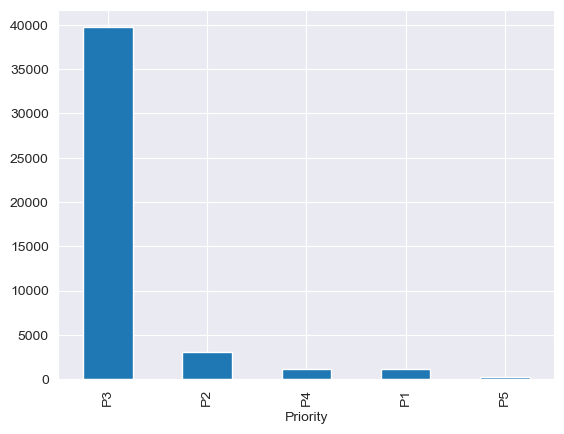

In [358]:
raw_df['Priority'].value_counts().plot(kind='bar');

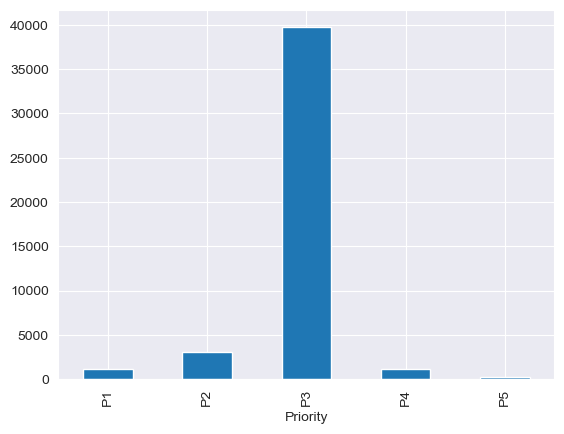

In [359]:
raw_df['Priority'].value_counts().sort_index().plot(kind='bar');

In [360]:
raw_df['Priority'].value_counts(normalize=True)

Priority
P3    0.876810
P2    0.067622
P4    0.025234
P1    0.024770
P5    0.005563
Name: proportion, dtype: float64

In [361]:
raw_df['Priority'].value_counts()

Priority
P3    39716
P2    3063 
P4    1143 
P1    1122 
P5    252  
Name: count, dtype: int64

In [362]:
# turn target to binary variable
raw_df["Priority"] = raw_df["Priority"].apply(lambda x: 'P3' if x == "P3" else 'rest')
raw_df['Priority'].value_counts()

Priority
P3      39716
rest    5580 
Name: count, dtype: int64

# Building a Text Classification system

In [363]:
df = raw_df[['Title','Description','Priority']]
df = df.dropna()
df['text'] = df['Title'] + ' ' + df['Description']
df = df.drop(columns=['Title','Description'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45253 entries, 0 to 45295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Priority  45253 non-null  object
 1   text      45253 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [364]:
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_colwidth', 1)
df.head(2)

,Priority,text
0,rest,Icons needed for actions (1GI5UXW) JGS (8/8/01 5:20:19 PM); \tWe need enabled; disabled & hover icons for the following actions:; \t\tCopyToClipboardActionDelegate; \t\tRelaunchActionDelegate; \t\tTerminateAndRemoveActionDelegate; ; DW (9/24/2001 2:22:48 PM); \tUse the standard copy icon for copy to clipboard (desktop likely exposes it).; ; DW (9/24/2001 2:23:05 PM); \tMade requests for; \t\tRelaunch; \t\tTerminate All; \t\tTerminate & Remove
1,P3,README: Hit count not reset (1GET20Y) JGS (6/4/01 11:43:47 AM); \tSet a breakpoint in InfiniteLoop with a hit count. When suspended;; \tright click breakpoint in Breakpoints viewer and enable. Hit count; \tstays at previous value. Should it be reset to zero?; ; DW (6/4/01 11:50:23 AM); \tThis should just re-enable the breakpoint with the previous hit-count.; ; DS (6/4/2001 11:50:31 AM); \tTo change a hit count breakpoint into a normal breakpoint; you set its hit count to zero.; \tThis should likely be a readme item.; ; DW (6/4/01 6:33:43 PM); \tMake into a README.; ; DW (6/15/01 9:45:55 AM); \tAdded to README.


In [365]:
pip install textacy

Note: you may need to restart the kernel to use updated packages.


In [366]:
import html

def clean(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['text'] = df['text'].apply(clean)
df = df[df['text'].str.len() > 50]
df.head(2)

,Priority,text
0,rest,Icons needed for actions (1GI5UXW) JGS (8/8/01 5:20:19 PM); We need enabled; disabled hover icons for the following actions:; CopyToClipboardActionDelegate; RelaunchActionDelegate; TerminateAndRemoveActionDelegate; ; DW (9/24/2001 2:22:48 PM); Use the standard copy icon for copy to clipboard (desktop likely exposes it).; ; DW (9/24/2001 2:23:05 PM); Made requests for; Relaunch; Terminate All; Terminate Remove
1,P3,README: Hit count not reset (1GET20Y) JGS (6/4/01 11:43:47 AM); Set a breakpoint in InfiniteLoop with a hit count. When suspended;; right click breakpoint in Breakpoints viewer and enable. Hit count; stays at previous value. Should it be reset to zero?; ; DW (6/4/01 11:50:23 AM); This should just re-enable the breakpoint with the previous hit-count.; ; DS (6/4/2001 11:50:31 AM); To change a hit count breakpoint into a normal breakpoint; you set its hit count to zero.; This should likely be a readme item.; ; DW (6/4/01 6:33:43 PM); Make into a README.; ; DW (6/15/01 9:45:55 AM); Added to README.


In [367]:
print('Size of the full data :', df.shape)

Size of the full data : (45051, 2)


In [368]:
# transform the target variable
df['Priority'] = df['Priority'].apply(lambda x: 1 if x == 'rest' else 0)

In [369]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Priority'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Priority'])

print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  36040
Size of Test Data  9011


In [370]:
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

In [371]:
%%time
model1 = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced')
model1.fit(X_train_tf, Y_train)

CPU times: total: 3min 39s
Wall time: 38.1 s


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)

In [372]:
X_test_tf = tfidf.transform(X_test)

In [373]:
Y_pred = model1.predict(X_test_tf)
print ('Accuracy Score : ', accuracy_score(Y_test, Y_pred))

Accuracy Score :  0.8812562423704361


In [374]:
from sklearn.metrics import cohen_kappa_score
print ('Kappa score : ', cohen_kappa_score(Y_test, Y_pred))

Kappa score :  0.13773990173827988


In [375]:
clf = DummyClassifier(strategy='most_frequent', random_state=42)
clf.fit(X_train, Y_train)
Y_pred_baseline = clf.predict(X_test)
print ('Accuracy Score : ', accuracy_score(Y_test, Y_pred_baseline))

Accuracy Score :  0.8769281988680502


In [376]:
print ('Kappa score : ', cohen_kappa_score(Y_test, Y_pred_baseline))

Kappa score :  0.0


In [377]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7902
           1       0.61      0.10      0.17      1109

    accuracy                           0.88      9011
   macro avg       0.75      0.54      0.55      9011
weighted avg       0.85      0.88      0.84      9011



In [378]:
# check classes
model1.classes_

array([0, 1], dtype=int64)

In [348]:
# get the probability
Y_pred_proba = model1.predict_proba(X_test_tf)[:,1]

ROC AUC Score: 0.728
PR AUC Score: 0.336


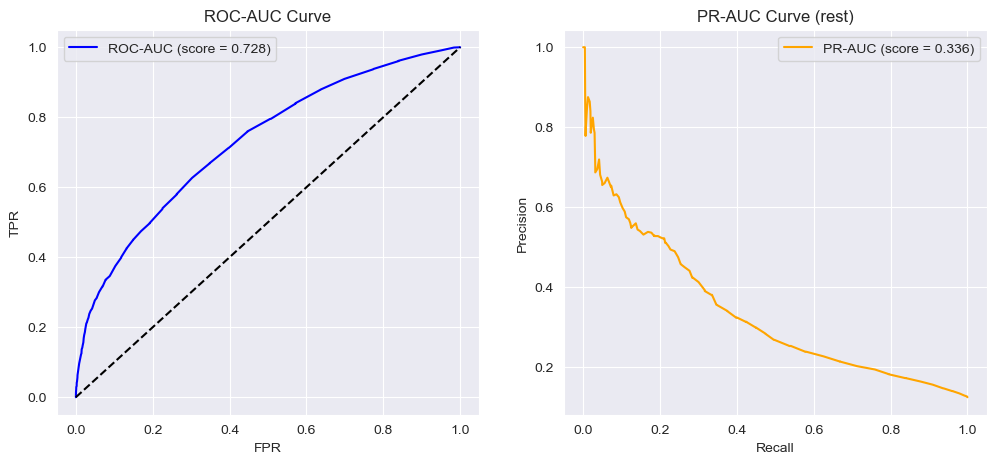

In [379]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve

# calculate scores
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)

precision, recall, _ = precision_recall_curve(Y_test, Y_pred_proba)  # PR-AUC here is about P3
pr_auc = auc(recall, precision)

# print scores
print(f"ROC AUC Score: {roc_auc:.3f}")
print(f"PR AUC Score: {pr_auc:.3f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)   # first we plot ROC-AUC
plt.plot(fpr, tpr, label=f'ROC-AUC (score = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--',color='black')  # randomly guessing 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC Curve')
plt.legend()

# now we plot PR-AUC
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR-AUC (score = {pr_auc:.3f})', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-AUC Curve (rest)')
plt.legend()
plt.show()

Performance on P3 is very good, but bad on rest. Next we need calculate weighted PR-AUC to evaluate.

In [380]:
from xgboost import XGBClassifier

class_weight_ratio = (Y_train == 1).sum() / (Y_train == 0).sum()
model2 = XGBClassifier(scale_pos_weight=class_weight_ratio*20, calss_weight='balanced', random_state=0, n_jobs=-1)
model2.fit(X_train_tf, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              calss_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, ...)

In [ ]:
Y_pred= model2.predict(X_test_tf)
print ('Accuracy Score : ', accuracy_score(Y_test, Y_pred))
print ('Kappa score : ', cohen_kappa_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy Score :  0.8733769836866052
Kappa score :  0.2421265845402255
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7902
           1       0.47      0.22      0.30      1109

    accuracy                           0.87      9011
   macro avg       0.68      0.59      0.62      9011
weighted avg       0.85      0.87      0.85      9011



ROC AUC Score: 0.723
PR AUC Score: 0.315


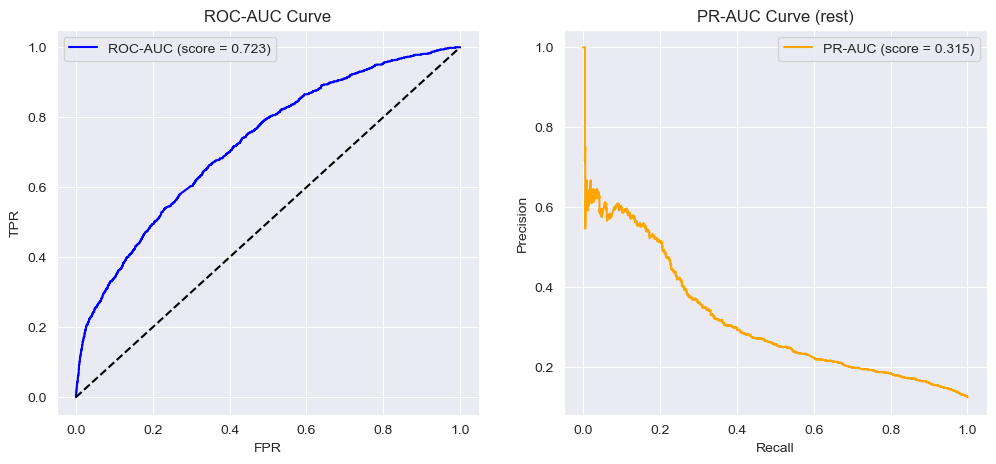

In [382]:
Y_pred_proba = model2.predict_proba(X_test_tf)[:,1]
# calculate scores
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)

precision, recall, _ = precision_recall_curve(Y_test, Y_pred_proba)  # PR-AUC here is about P3
pr_auc = auc(recall, precision)

# print scores
print(f"ROC AUC Score: {roc_auc:.3f}")
print(f"PR AUC Score: {pr_auc:.3f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)   # first we plot ROC-AUC
plt.plot(fpr, tpr, label=f'ROC-AUC (score = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--',color='black')  # randomly guessing 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC Curve')
plt.legend()

# now we plot PR-AUC
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR-AUC (score = {pr_auc:.3f})', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-AUC Curve (rest)')
plt.legend()
plt.show()

In [383]:
# on P3
precision_p3, recall_p3, _ = precision_recall_curve(Y_test, Y_pred_proba)
pr_auc_p3 = auc(recall_p3, precision_p3)

# on rest
precision_rest, recall_rest, _ = precision_recall_curve(1 - Y_test, 1 - Y_pred_proba)
pr_auc_rest = auc(recall_rest, precision_rest)

# Weighted PR-AUC
weight_p3 = len(Y_test[Y_test == 1]) / len(Y_test)
weight_rest = len(Y_test[Y_test == 0]) / len(Y_test)

pr_auc_weighted = (pr_auc_p3 * weight_p3 + pr_auc_rest * weight_rest)
print(f"Weighted PR AUC Score: {pr_auc_weighted:.3f}")

Weighted PR AUC Score: 0.866


The overall prediction is ok, but it still struggles on rest because low ROC-AUC score and PR-AUC Score.

In [403]:
from sklearn.naive_bayes import ComplementNB

model3 = ComplementNB(alpha=0.1)

model3.fit(X_train_tf, Y_train)
Y_pred= model3.predict(X_test_tf)
print ('Accuracy Score : ', accuracy_score(Y_test, Y_pred))
print ('Kappa score : ', cohen_kappa_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


Accuracy Score :  0.75363444678726
Kappa score :  0.21681444200805744
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      7902
           1       0.26      0.53      0.35      1109

    accuracy                           0.75      9011
   macro avg       0.59      0.66      0.60      9011
weighted avg       0.84      0.75      0.79      9011



ROC AUC Score: 0.733
PR AUC Score: 0.294


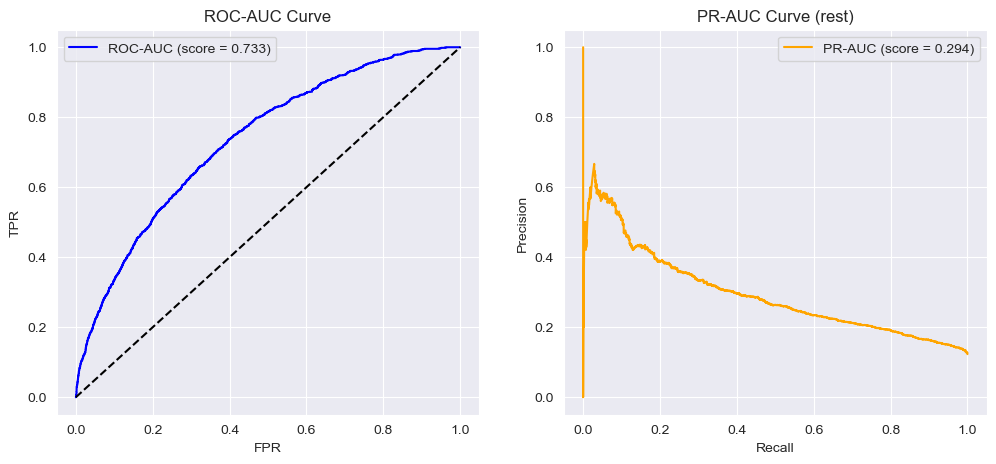

In [404]:
Y_pred_proba = model3.predict_proba(X_test_tf)[:,1]
# calculate scores
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)

precision, recall, _ = precision_recall_curve(Y_test, Y_pred_proba)  # PR-AUC here is about P3
pr_auc = auc(recall, precision)

# print scores
print(f"ROC AUC Score: {roc_auc:.3f}")
print(f"PR AUC Score: {pr_auc:.3f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)   # first we plot ROC-AUC
plt.plot(fpr, tpr, label=f'ROC-AUC (score = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--',color='black')  # randomly guessing 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC Curve')
plt.legend()

# now we plot PR-AUC
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR-AUC (score = {pr_auc:.3f})', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-AUC Curve (rest)')
plt.legend()
plt.show()

In [409]:
from lightgbm import LGBMClassifier

model4 = LGBMClassifier(class_weight='balanced', random_state=0, n_jobs=-1,max_depth=8)
model4.fit(X_train_tf, Y_train)

Y_pred= model4.predict(X_test_tf)
print ('Accuracy Score : ', accuracy_score(Y_test, Y_pred))
print ('Kappa score : ', cohen_kappa_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[LightGBM] [Info] Number of positive: 4436, number of negative: 31604
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.673046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 708829
[LightGBM] [Info] Number of data points in the train set: 36040, number of used features: 19575
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

Until, we define that CNB is slightly better than others.

---

## Class imbalance

A small conclusion: Now our model(RF) could have an excellent performance on P3, but bad performance on rest. The ROC-AUC score is 0.711 which is not good enough. This indicator is threshold independent. But I'd like to change threshold to improve classificaiton ability.

### best threshold-(for minority class)-CNB

In [456]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.01, 0.99, 0.01)  # choose different thresholds
precisions, recalls, f1_scores = [], [], []

Y_pred_proba = model3.predict_proba(X_test_tf)[:,1]

for threshold in thresholds:
    Y_pred_adjusted = (Y_pred_proba >= threshold).astype(int)
    
    precision = precision_score(Y_test, Y_pred_adjusted)
    recall = recall_score(Y_test, Y_pred_adjusted)
    f1 = f1_score(Y_test, Y_pred_adjusted)

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# find the best f1 score and the best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"best threshold: {best_threshold:.2f}")
print(f"Precision: {precisions[best_idx]:.3f}")
print(f"Recall: {recalls[best_idx]:.3f}")
print(f"F1-score: {f1_scores[best_idx]:.3f}")

best threshold: 0.59
Precision: 0.317
Recall: 0.395
F1-score: 0.352


---

方案 1：随机过采样（Random Oversampling, ROS）
方案 2：欠采样 + 过采样（推荐！）
方案 3：数据增强 + 过采样（适用于文本分类）

### RandomOversampling

In [457]:
df1 = df.copy()
df1.head(2)

,Priority,text
0,1,Icons needed for actions (1GI5UXW) JGS (8/8/01 5:20:19 PM); We need enabled; disabled hover icons for the following actions:; CopyToClipboardActionDelegate; RelaunchActionDelegate; TerminateAndRemoveActionDelegate; ; DW (9/24/2001 2:22:48 PM); Use the standard copy icon for copy to clipboard (desktop likely exposes it).; ; DW (9/24/2001 2:23:05 PM); Made requests for; Relaunch; Terminate All; Terminate Remove
1,0,README: Hit count not reset (1GET20Y) JGS (6/4/01 11:43:47 AM); Set a breakpoint in InfiniteLoop with a hit count. When suspended;; right click breakpoint in Breakpoints viewer and enable. Hit count; stays at previous value. Should it be reset to zero?; ; DW (6/4/01 11:50:23 AM); This should just re-enable the breakpoint with the previous hit-count.; ; DS (6/4/2001 11:50:31 AM); To change a hit count breakpoint into a normal breakpoint; you set its hit count to zero.; This should likely be a readme item.; ; DW (6/4/01 6:33:43 PM); Make into a README.; ; DW (6/15/01 9:45:55 AM); Added to README.


In [458]:
X_train, X_test, Y_train, Y_test = train_test_split(df1[['text']],
                                                    df1[['Priority']],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df1[['Priority']])

print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  36040
Size of Test Data  9011


Here before we sample, we need split the data first and sample only on the train data. Reasons:1. Avoid the model presee the test data. 2. In real life, data is imbalanced, we need test on imbalanced data.

In [459]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, Y_train)


In [460]:
# check the distribution
y_resampled.value_counts()

Priority
0           31604
1           31604
Name: count, dtype: int64

In [461]:
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_resampled_tf = tfidf.fit_transform(X_resampled['text'])

In [462]:
%%time
model3.fit(X_resampled_tf, y_resampled)

CPU times: total: 46.9 ms
Wall time: 60.4 ms


ComplementNB(alpha=0.1)

In [463]:
X_test_tf = tfidf.transform(X_test['text'])
Y_pred = model3.predict(X_test_tf)

print ('Accuracy Score : ', accuracy_score(Y_test, Y_pred))
print ('Kappa score : ', cohen_kappa_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy Score :  0.8276550882255022
Kappa score :  0.2500920231410133
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7902
           1       0.33      0.38      0.35      1109

    accuracy                           0.83      9011
   macro avg       0.62      0.63      0.62      9011
weighted avg       0.84      0.83      0.83      9011



In [464]:

# get the probability
Y_pred_proba = model3.predict_proba(X_test_tf)[:,1]

ROC AUC Score: 0.738
PR AUC Score: 0.311


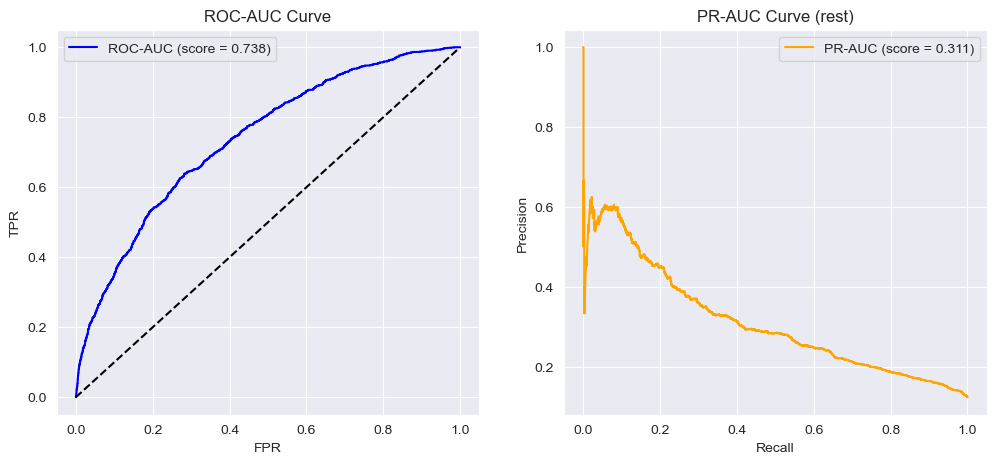

In [465]:
# calculate scores
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)

precision, recall, _ = precision_recall_curve(Y_test, Y_pred_proba)  # PR-AUC here is about P3
pr_auc = auc(recall, precision)

# print scores
print(f"ROC AUC Score: {roc_auc:.3f}")
print(f"PR AUC Score: {pr_auc:.3f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)   # first we plot ROC-AUC
plt.plot(fpr, tpr, label=f'ROC-AUC (score = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--',color='black')  # randomly guessing 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC Curve')
plt.legend()

# now we plot PR-AUC
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR-AUC (score = {pr_auc:.3f})', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-AUC Curve (rest)')
plt.legend()
plt.show()

In [466]:

thresholds = np.arange(0.01, 0.99, 0.01)  # choose different thresholds
precisions, recalls, f1_scores = [], [], []

Y_pred_proba = model3.predict_proba(X_test_tf)[:,1]

for threshold in thresholds:
    Y_pred_adjusted = (Y_pred_proba >= threshold).astype(int)
    
    precision = precision_score(Y_test, Y_pred_adjusted)
    recall = recall_score(Y_test, Y_pred_adjusted)
    f1 = f1_score(Y_test, Y_pred_adjusted)

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# find the best f1 score and the best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"best threshold: {best_threshold:.2f}")
print(f"Precision: {precisions[best_idx]:.3f}")
print(f"Recall: {recalls[best_idx]:.3f}")
print(f"F1-score: {f1_scores[best_idx]:.3f}")

best threshold: 0.35
Precision: 0.283
Recall: 0.514
F1-score: 0.365


By simply oversampling minority, we could improve the performance a little bit.

---

### Random Undersampling

In [479]:
X_train, X_test, Y_train, Y_test = train_test_split(df1[['text']],
                                                    df1[['Priority']],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df1[['Priority']])

print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  36040
Size of Test Data  9011


In [480]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  
X_resampled_under, y_resampled_under = undersampler.fit_resample(X_train, Y_train)

# check the distribution
y_resampled_under.value_counts()

Priority
0           8872
1           4436
Name: count, dtype: int64

In [481]:
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_resampled_under_tf = tfidf.fit_transform(X_resampled_under['text'])

In [482]:
%%time
model3.fit(X_resampled_under_tf, y_resampled_under)

CPU times: total: 0 ns
Wall time: 13 ms


ComplementNB(alpha=0.1)

In [483]:
X_test_tf = tfidf.transform(X_test['text'])
Y_pred = model3.predict(X_test_tf)

print ('Accuracy Score : ', accuracy_score(Y_test, Y_pred))
print ('Kappa score : ', cohen_kappa_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy Score :  0.7146820552657862
Kappa score :  0.19242691991486904
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      7902
           1       0.23      0.58      0.33      1109

    accuracy                           0.71      9011
   macro avg       0.58      0.66      0.58      9011
weighted avg       0.84      0.71      0.76      9011



ROC AUC Score: 0.725
PR AUC Score: 0.293


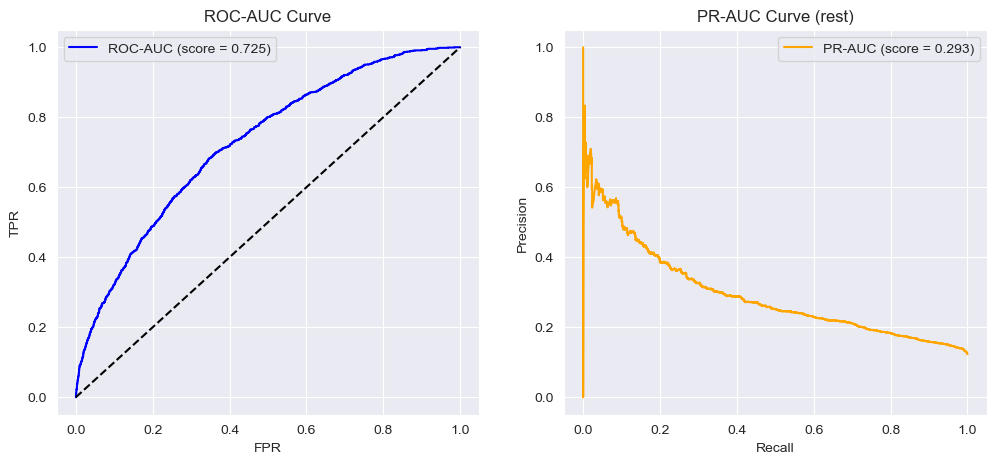

In [ ]:
# get the probability
Y_pred_proba = model3.predict_proba(X_test_tf)[:,1]

# calculate scores
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)

precision, recall, _ = precision_recall_curve(Y_test, Y_pred_proba)  # PR-AUC here is about P3
pr_auc = auc(recall, precision)

# print scores
print(f"ROC AUC Score: {roc_auc:.3f}")
print(f"PR AUC Score: {pr_auc:.3f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)   # first we plot ROC-AUC
plt.plot(fpr, tpr, label=f'ROC-AUC (score = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--',color='black')  # randomly guessing 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC Curve')
plt.legend()

# now we plot PR-AUC
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR-AUC (score = {pr_auc:.3f})', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-AUC Curve (rest)')
plt.legend()
plt.show()

The performance is worse than oversampling. (even if change the sample strategy).

---

### SMOTE

In [429]:
from imblearn.over_sampling import SMOTE

X_train, X_test, Y_train, Y_test = train_test_split(df1[['text']], df1[['Priority']], test_size=0.2, random_state=42, stratify=df1[['Priority']])

tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_train_tf= tfidf.fit_transform(X_train['text'])  
X_test_tf = tfidf.transform(X_test['text']) 

smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tf, Y_train)


In [430]:
%%time

model3.fit(X_train_resampled, y_train_resampled)

CPU times: total: 15.6 ms
Wall time: 71.9 ms


ComplementNB(alpha=0.1)

In [ ]:
Y_pred = model3.predict(X_test_tf)
print ('Accuracy Score : ', accuracy_score(Y_test, Y_pred))
print ('Kappa score : ', cohen_kappa_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy Score :  0.7729441793363666
Kappa score :  0.2302989536010257
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      7902
           1       0.27      0.50      0.35      1109

    accuracy                           0.77      9011
   macro avg       0.60      0.66      0.61      9011
weighted avg       0.84      0.77      0.80      9011



In [432]:
# get the probability
Y_pred_proba = model3.predict_proba(X_test_tf)[:,1]

ROC AUC Score: 0.733
PR AUC Score: 0.298


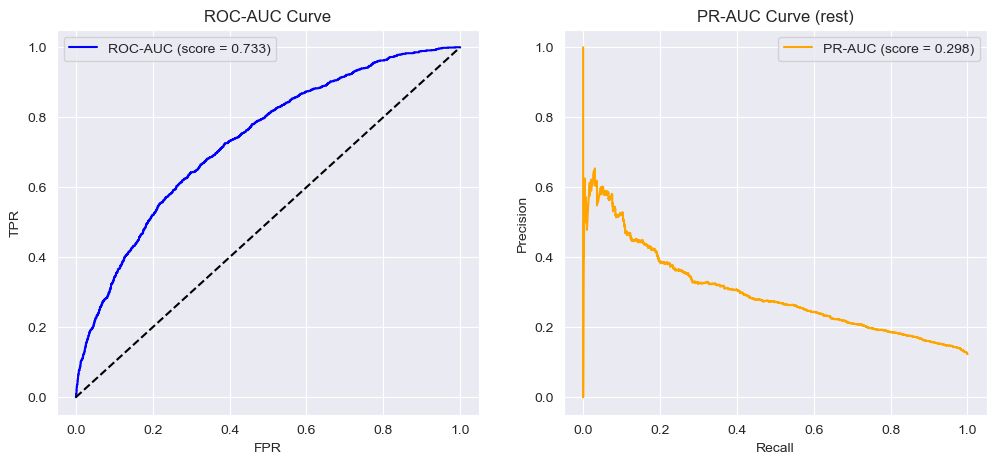

In [433]:
# calculate scores
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)

precision, recall, _ = precision_recall_curve(Y_test, Y_pred_proba)  # PR-AUC here is about P3
pr_auc = auc(recall, precision)

# print scores
print(f"ROC AUC Score: {roc_auc:.3f}")
print(f"PR AUC Score: {pr_auc:.3f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)   # first we plot ROC-AUC
plt.plot(fpr, tpr, label=f'ROC-AUC (score = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--',color='black')  # randomly guessing 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC Curve')
plt.legend()

# now we plot PR-AUC
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR-AUC (score = {pr_auc:.3f})', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-AUC Curve (rest)')
plt.legend()
plt.show()

No further improvement than random oversampling.

---

### ADASYN

In [434]:
from imblearn.over_sampling import ADASYN

X_train, X_test, Y_train, Y_test = train_test_split(df1[['text']], df1[['Priority']], test_size=0.2, random_state=42, stratify=df1[['Priority']])

tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_train_tf= tfidf.fit_transform(X_train['text'])  
X_test_tf = tfidf.transform(X_test['text']) 

adasyn = ADASYN(sampling_strategy=1.0, random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_tf, Y_train)

model3.fit(X_train_resampled, y_train_resampled)

ComplementNB(alpha=0.1)

In [435]:
Y_pred = model1.predict(X_test_tf)

print ('Accuracy Score : ', accuracy_score(Y_test, Y_pred))
print ('Kappa score : ', cohen_kappa_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy Score :  0.87681722339363
Kappa score :  0.21932715562099958
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7902
           1       0.50      0.19      0.27      1109

    accuracy                           0.88      9011
   macro avg       0.70      0.58      0.60      9011
weighted avg       0.85      0.88      0.85      9011



ROC AUC Score: 0.735
PR AUC Score: 0.301


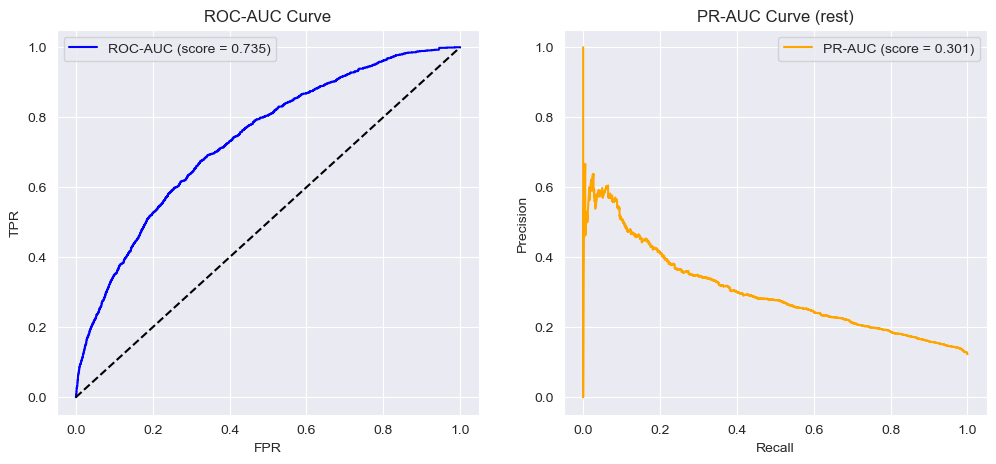

In [436]:

Y_pred_proba = model3.predict_proba(X_test_tf)[:,1]
# calculate scores
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)

precision, recall, _ = precision_recall_curve(Y_test, Y_pred_proba)  # PR-AUC here is about P3
pr_auc = auc(recall, precision)

# print scores
print(f"ROC AUC Score: {roc_auc:.3f}")
print(f"PR AUC Score: {pr_auc:.3f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)   # first we plot ROC-AUC
plt.plot(fpr, tpr, label=f'ROC-AUC (score = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--',color='black')  # randomly guessing 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC Curve')
plt.legend()

# now we plot PR-AUC
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR-AUC (score = {pr_auc:.3f})', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-AUC Curve (rest)')
plt.legend()
plt.show()

Also no further improvement.

---

### Data Augmentation

#### NLPAug

In [165]:
pip install nlpaug

Note: you may need to restart the kernel to use updated packages.


In [442]:
X_train, X_test, Y_train, Y_test = train_test_split(df1['text'], df1['Priority'], test_size=0.2, random_state=42, stratify=df1['Priority'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  36040
Size of Test Data  9011


In [450]:
import nlpaug.augmenter.word as naw

augmenter = naw.SynonymAug(aug_src="wordnet", aug_p=0.8)  # 80% of the text will be augmented
X_train_augmented = []
y_train_augmented = []

for text, label in zip(X_train, Y_train):
    X_train_augmented.append(text)  
    y_train_augmented.append(label)

    if label == 1:  
        aug_text = augmenter.augment(text)
        # check augmentation
        if isinstance(aug_text, list) and len(aug_text) > 0:
            aug_text = aug_text[0]  # pick the first augmented text
            
            X_train_augmented.append(aug_text)
            y_train_augmented.append(label)
        else:
            print("No augmentation for:", text)

# turn to dataframe
X_train_augmented = pd.DataFrame(X_train_augmented, columns=["text"])
y_train_augmented = pd.DataFrame(y_train_augmented, columns=["Priority"])

# turn to string
X_train_augmented["text"] = X_train_augmented["text"].astype(str)


print("Size of Training Data after augmentation:", X_train_augmented.shape[0])
print("Size of Test Data:", X_test.shape[0])



Size of Training Data after augmentation: 40476
Size of Test Data: 9011


In [451]:
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_train_tf= tfidf.fit_transform(X_train_augmented['text'])  
X_test_tf = tfidf.transform(X_test) # here X_test is series

# oversampling
ros = RandomOverSampler(sampling_strategy=1.0, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_tf, y_train_augmented)

In [452]:

model3.fit(X_train_resampled, y_train_resampled)

ComplementNB(alpha=0.1)

In [453]:
Y_pred = model3.predict(X_test_tf)

print ('Accuracy Score : ', accuracy_score(Y_test, Y_pred))
print ('Kappa score : ', cohen_kappa_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy Score :  0.7872600155365664
Kappa score :  0.22639325653344855
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      7902
           1       0.28      0.45      0.34      1109

    accuracy                           0.79      9011
   macro avg       0.60      0.64      0.61      9011
weighted avg       0.84      0.79      0.81      9011



ROC AUC Score: 0.732
PR AUC Score: 0.301


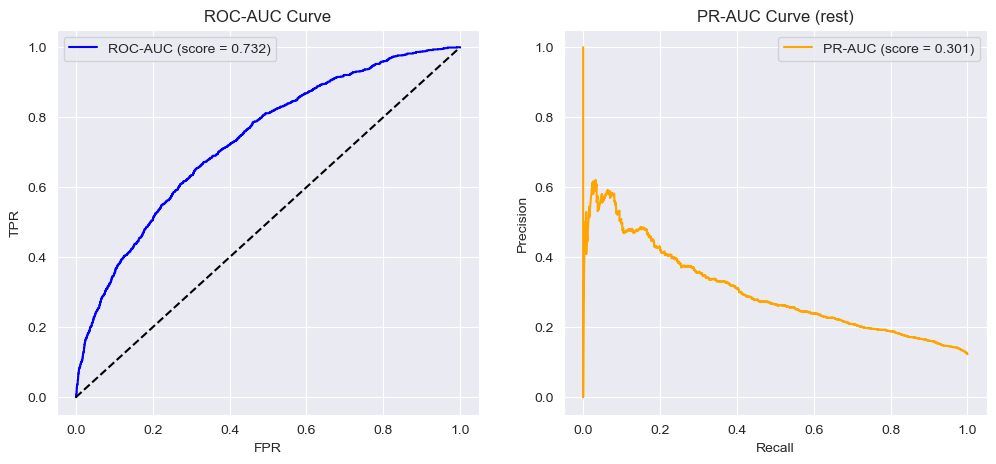

In [454]:
Y_pred_proba = model3.predict_proba(X_test_tf)[:,1]
# calculate scores
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)

precision, recall, _ = precision_recall_curve(Y_test, Y_pred_proba)  # PR-AUC here is about P3
pr_auc = auc(recall, precision)

# print scores
print(f"ROC AUC Score: {roc_auc:.3f}")
print(f"PR AUC Score: {pr_auc:.3f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)   # first we plot ROC-AUC
plt.plot(fpr, tpr, label=f'ROC-AUC (score = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--',color='black')  # randomly guessing 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC Curve')
plt.legend()

# now we plot PR-AUC
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR-AUC (score = {pr_auc:.3f})', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-AUC Curve (rest)')
plt.legend()
plt.show()

In [395]:

model2.fit(X_train_resampled, y_train_resampled)
Y_pred = model1.predict(X_test_tf)

print ('Accuracy Score : ', accuracy_score(Y_test, Y_pred))
print ('Kappa score : ', cohen_kappa_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy Score :  0.87681722339363
Kappa score :  0.21932715562099958
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7902
           1       0.50      0.19      0.27      1109

    accuracy                           0.88      9011
   macro avg       0.70      0.58      0.60      9011
weighted avg       0.85      0.88      0.85      9011



This simple augmentation method(Synonyms) couldn't work well. Several reasons: 1. Text has words not in wordnet. 2. Text itself is hard to distinguish. And other reasons.

---

### Hyperparameter tuning

In [492]:
X_train, X_test, Y_train, Y_test = train_test_split(df1[['text']],
                                                    df1[['Priority']],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df1[['Priority']])

print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  36040
Size of Test Data  9011


In [493]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline

ros = RandomOverSampler(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, Y_train)   # same as before
X_resampled = X_resampled.iloc[:, 0].tolist()  # need turn to list

param_grid = {
    "tfidf__max_df": [0.7, 0.85, 1.0],  
    "tfidf__min_df": [1, 2, 5, 10],
    "tfidf__ngram_range": [(1, 1), (1, 2)], 
    "cnb__alpha": [0.1, 0.3, 0.5, 1.0],  
}

pipeline = ImbPipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("cnb", ComplementNB())
])

grid_search = GridSearchCV(pipeline, param_grid, scoring="f1_macro", cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_resampled, y_resampled)

print("best parameter:", grid_search.best_params_)
print("best score:", grid_search.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
best parameter: {'cnb__alpha': 0.1, 'tfidf__max_df': 0.7, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
best score: 0.9508351977580315


In [495]:
best_model= grid_search.best_estimator_
Y_pred = best_model.predict(X_test['text'])

print ('Accuracy Score : ', accuracy_score(Y_test, Y_pred))
print ('Kappa score : ', cohen_kappa_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy Score :  0.8530684718677173
Kappa score :  0.23040148437118002
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7902
           1       0.37      0.27      0.31      1109

    accuracy                           0.85      9011
   macro avg       0.63      0.60      0.61      9011
weighted avg       0.84      0.85      0.84      9011



In [498]:
thresholds = np.arange(0.01, 0.99, 0.01)  # choose different thresholds
precisions, recalls, f1_scores = [], [], []

Y_pred_proba = best_model.predict_proba(X_test['text'])[:,1]

for threshold in thresholds:
    Y_pred_adjusted = (Y_pred_proba >= threshold).astype(int)
    
    precision = precision_score(Y_test, Y_pred_adjusted)
    recall = recall_score(Y_test, Y_pred_adjusted)
    f1 = f1_score(Y_test, Y_pred_adjusted)

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# find the best f1 score and the best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"best threshold: {best_threshold:.2f}")
print(f"Precision: {precisions[best_idx]:.3f}")
print(f"Recall: {recalls[best_idx]:.3f}")
print(f"F1-score: {f1_scores[best_idx]:.3f}")

best threshold: 0.20
Precision: 0.282
Recall: 0.463
F1-score: 0.350


In [507]:
thresholds = np.arange(0.01, 0.99, 0.01)  # choose different thresholds
precisions, recalls, f1_scores = [], [], []

Y_pred_proba = best_model.predict_proba(X_test['text'])[:,1]

for threshold in thresholds:
    Y_pred_adjusted = (Y_pred_proba >= threshold).astype(int)
    
    precision = precision_score(Y_test, Y_pred_adjusted)
    recall = recall_score(Y_test, Y_pred_adjusted)
    f1 = f1_score(Y_test, Y_pred_adjusted)

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# find the best f1 score and the best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"best threshold: {best_threshold:.2f}")
print(f"Precision: {precisions[best_idx]:.3f}")
print(f"Recall: {recalls[best_idx]:.3f}")
print(f"F1-score: {f1_scores[best_idx]:.3f}")

best threshold: 0.20
Precision: 0.282
Recall: 0.463
F1-score: 0.350


By choosing threshold, we could achieve f1 score = 0.35 for minority calss, which is almost same as before.

---

### Conclusion

Now, our best method: Random Oversampling + TfidfVectorizer + ComplementNB. (the affect of hyperparameter tuning is very slight, don't consider).

ComplementNB is suitable for imbalanced text classification, and it's very fast. More importantly, ComplementNB is very transparent which could explain each word's weight, each class's probability, and also class preference.

To further improve performance on imbalanced set, we need advanced methods on these 3 steps.
For example: 
1.augmentation methods: Back translation, Bert embeddings, and so on.
2.vectorization methods: word2vec, bert vectorization.
3.models: in deep learning, BiLSTM, BertClassifier, and so on.
But with more advanced models, we will lose explainability.

We could apply these methods here, but we would explore more in the next project.